In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 284807 entries, 0 to 284806

Data columns (total 31 columns):

 #   Column  Non-Null Count   Dtype  

---  ------  --------------   -----  

 0   Time    284807 non-null  float64

 1   V1      284807 non-null  float64

 2   V2      284807 non-null  float64

 3   V3      284807 non-null  float64

 4   V4      284807 non-null  float64

 5   V5      284807 non-null  float64

 6   V6      284807 non-null  float64

 7   V7      284807 non-null  float64

 8   V8      284807 non-null  float64

 9   V9      284807 non-null  float64

 10  V10     284807 non-null  float64

 11  V11     284807 non-null  float64

 12  V12     284807 non-null  float64

 13  V13     284807 non-null  float64

 14  V14     284807 non-null  float64

 15  V15     284807 non-null  float64

 16  V16     284807 non-null  float64

 17  V17     284807 non-null  float64

 18  V18     284807 non-null  float64

 19  V19     284807 non-null  float64

 20  V20     284807 non-null

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df["Class"].value_counts()
# data is higly imbalance as you can see that the fraud transaction are only 492 and non Fraud transaction are 284315


Class
0    284315
1       492
Name: count, dtype: int64

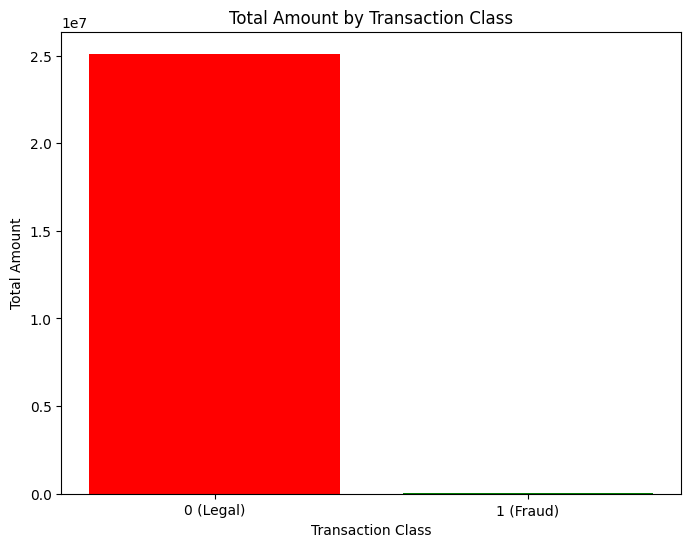

In [70]:
import matplotlib.pyplot as plt

class_totals = df.groupby('Class')['Amount'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_totals['Class'].astype(str), class_totals['Amount'], color=['red', 'green'])
plt.xlabel('Transaction Class')
plt.ylabel('Total Amount')
plt.title('Total Amount by Transaction Class')
plt.xticks([0, 1], ['0 (Legal)', '1 (Fraud)'])  # Label the x-axis ticks
plt.show()

here is some visuals of imbalanced Dataset so thats why it was important balance the Dataset before training the model

In [7]:
legal=df[df.Class==0]
fraud=df[df.Class==1]

In [8]:
legal.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling


In [11]:
legal_sample=legal.sample(n=492)# because the Fraud data is 492

In [12]:
legal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176470,122783.0,1.966685,-0.479094,-0.431815,-0.045090,-0.525147,-0.029613,-0.728101,0.220361,1.196864,...,-0.154520,-0.396971,0.438297,0.651224,-0.561483,-0.330433,-0.001270,-0.042397,1.23,0
142832,84965.0,-1.113915,0.878354,1.151768,0.134744,0.355986,-1.098831,0.718443,-0.270557,-0.355328,...,-0.249095,-0.542071,0.345410,0.358835,-0.045294,0.043555,-0.163115,0.217452,1.79,0
170040,119991.0,1.954641,0.566655,-1.145624,3.379096,0.982731,0.527518,0.155263,0.053430,-1.335515,...,0.236659,0.611027,0.021971,0.176043,0.178854,0.112445,-0.056986,-0.060989,4.53,0
161535,114294.0,2.068960,0.115592,-1.672753,0.447632,0.306299,-0.956441,0.141254,-0.204969,0.588289,...,-0.366066,-0.979987,0.361337,0.620294,-0.294164,0.167600,-0.066769,-0.030995,0.89,0
25624,33693.0,-0.745720,0.724839,2.015083,-1.422795,-0.262881,-0.849840,0.655867,-0.387444,-1.559056,...,-0.227183,-0.591924,-0.036989,0.577115,0.009108,-0.652861,-0.135404,-0.094540,2.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78331,57479.0,1.044094,-0.331808,1.073190,1.546918,-0.605499,1.086849,-0.716216,0.520166,1.198131,...,-0.394772,-0.771578,0.039363,-0.333755,0.395407,-0.503548,0.077612,0.013980,18.40,0
61752,49971.0,1.113399,-0.764988,1.060626,0.226838,-1.116453,0.587926,-1.050377,0.171407,-0.776561,...,-0.039877,0.251243,-0.200864,-0.488167,0.353724,-0.233265,0.090074,0.048759,100.00,0
96229,65675.0,-5.277692,3.487837,-1.201844,-0.192904,-0.158582,0.949549,0.467901,-0.788434,4.652615,...,-0.477313,-1.077669,0.160074,-1.535126,0.873245,-0.322503,1.383375,0.758996,28.90,0
245181,152637.0,1.989329,-0.679399,-0.384935,0.066623,-0.406900,0.854302,-1.148697,0.427582,1.389666,...,-0.019563,0.017085,0.255140,-0.219918,-0.508703,0.367023,-0.016167,-0.052115,6.99,0


In [13]:
new_df=pd.concat([legal_sample,fraud],axis=0)# axis 0 means rows if we do axis 1 then it means column

In [14]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176470,122783.0,1.966685,-0.479094,-0.431815,-0.045090,-0.525147,-0.029613,-0.728101,0.220361,1.196864,...,-0.154520,-0.396971,0.438297,0.651224,-0.561483,-0.330433,-0.001270,-0.042397,1.23,0
142832,84965.0,-1.113915,0.878354,1.151768,0.134744,0.355986,-1.098831,0.718443,-0.270557,-0.355328,...,-0.249095,-0.542071,0.345410,0.358835,-0.045294,0.043555,-0.163115,0.217452,1.79,0
170040,119991.0,1.954641,0.566655,-1.145624,3.379096,0.982731,0.527518,0.155263,0.053430,-1.335515,...,0.236659,0.611027,0.021971,0.176043,0.178854,0.112445,-0.056986,-0.060989,4.53,0
161535,114294.0,2.068960,0.115592,-1.672753,0.447632,0.306299,-0.956441,0.141254,-0.204969,0.588289,...,-0.366066,-0.979987,0.361337,0.620294,-0.294164,0.167600,-0.066769,-0.030995,0.89,0
25624,33693.0,-0.745720,0.724839,2.015083,-1.422795,-0.262881,-0.849840,0.655867,-0.387444,-1.559056,...,-0.227183,-0.591924,-0.036989,0.577115,0.009108,-0.652861,-0.135404,-0.094540,2.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


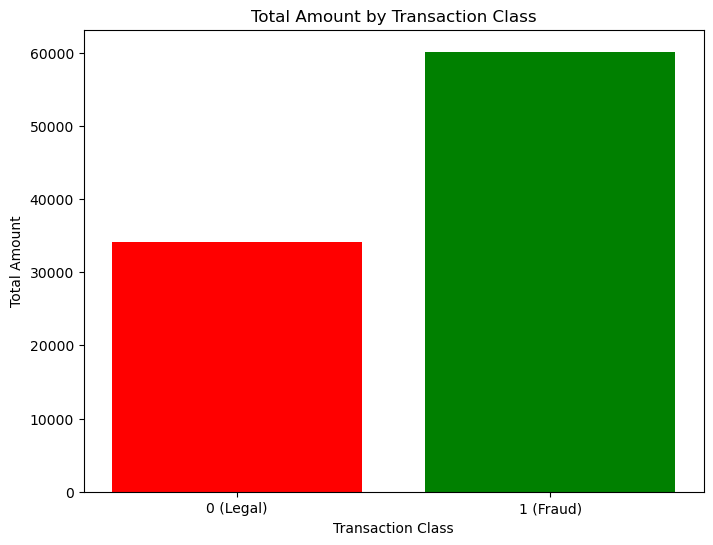

In [29]:
class_total = new_df.groupby('Class')['Amount'].sum().reset_index()


# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_total['Class'].astype(str), class_total['Amount'], color=['red', 'green'])
plt.xlabel('Transaction Class')
plt.ylabel('Total Amount')
plt.title('Total Amount by Transaction Class')
plt.xticks([0, 1], ['0 (Legal)', '1 (Fraud)'])  # Label the x-axis ticks
plt.show()

as you can see the bar plot shows the balance data and also shows that more fraud have occur

now as the data set in perfectly balance because legal and fraud transaction are now equal no we can train our model on new_df by using train_test_split


In [16]:
X=new_df.drop("Class",axis=1)
Y=new_df.Class

In [17]:
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
176470,122783.0,1.966685,-0.479094,-0.431815,-0.045090,-0.525147,-0.029613,-0.728101,0.220361,1.196864,...,-0.248817,-0.154520,-0.396971,0.438297,0.651224,-0.561483,-0.330433,-0.001270,-0.042397,1.23
142832,84965.0,-1.113915,0.878354,1.151768,0.134744,0.355986,-1.098831,0.718443,-0.270557,-0.355328,...,0.040311,-0.249095,-0.542071,0.345410,0.358835,-0.045294,0.043555,-0.163115,0.217452,1.79


In [18]:
Y.head(2)

176470    0
142832    0
Name: Class, dtype: int64

now spliting the data to train_test_split using sklearn.model_selection


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [20]:
X_train.shape

(787, 30)

In [21]:
Y_train.shape

(787,)

In [22]:
X_test.shape

(197, 30)

In [23]:
Y_test.shape

(197,)

Now Training Our model from
 sklearn.linear_model using LogisticeRegression


In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
model.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [27]:
model.score(X_train,Y_train)

0.928843710292249

As you can see the model is 92 percent Accurate